# Task 1 counting the steps

#### Number of steps equals lines of code (in the algorithm)

Vary the size of the input and record
the number of steps. \
Plot the number of steps as a function the input size (n)
to confirm that the plotted functions match the asymptotic running time shown
in the Table.

In [10]:
import matplotlib.pyplot as plt
import random
import numpy as np

# Initialize arrays for sorting algorithms
arr5 = [random.randint(0, 100) for i in range(5)]
arr100 = [random.randint(0, 100) for i in range(100)]
arr500 = [random.randint(0, 100) for i in range(500)]
arr10000 = [random.randint(0, 100) for i in range(10000)]
arr25000 = [random.randint(0, 100) for i in range(25000)]
arrs = [arr5, arr100, arr500, arr10000, arr25000]

## Insertion Sort

In [11]:
def insertion_sort(arr):
    n = len(arr)
    num_steps = 0

    # If the array has 0 or 1 element, it is already sorted, so return
    if n <= 1:
        return num_steps, n
    
    # Iterate over the array starting from the second element
    for i in range(1, n):
        num_steps += 2
        # Store the current element as the key to be inserted in the right position
        key = arr[i]
        j = i-1
        # Move elements greater than key one position ahead
        while j >= 0 and key < arr[j]:
            num_steps += 2
            # Shift elements to the right
            arr[j+1] = arr[j]
            j -= 1
        # Insert the key in the right position
        num_steps += 1
        arr[j+1] = key

     # Return the number of steps and the length of the array
    return num_steps, n


Array length: 5, Number of steps: 12, Constant factor: 0.48
Array length: 100, Number of steps: 297, Constant factor: 0.0297
Array length: 500, Number of steps: 1497, Constant factor: 0.005988
Array length: 10000, Number of steps: 29997, Constant factor: 0.00029997
Array length: 25000, Number of steps: 74997, Constant factor: 0.0001199952


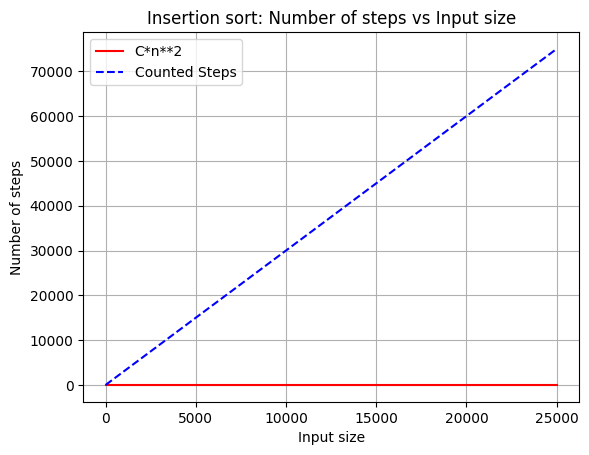

In [19]:
steps = []
input_sizes = []
actual_array = []

for arr in arrs:
    num_steps, n = insertion_sort(arr)
    steps.append(num_steps)
    input_sizes.append(n)
    constant_factor = num_steps / n**2
    actual = constant_factor * n**2
    actual_array.append(constant_factor)
    print(f"Array length: {n}, Number of steps: {num_steps}, Constant factor: {constant_factor}")

median_value = np.median(actual_array)

# Multiply each element in actual_array by the median value
modified_actual_array = [x * median_value for x in actual_array]

plt.plot(input_sizes, modified_actual_array, label="C*n**2", color='red')
plt.plot(input_sizes, steps, label="Counted Steps",color='blue', linestyle='--')
plt.xlabel('Input size')
plt.ylabel('Number of steps')
plt.title('Insertion sort: Number of steps vs Input size')
plt.legend()
plt.grid(True)
plt.show()


## Merge Sort

In [13]:
def merge_sort(arr):
    n = len(arr)
    num_steps = 0
    
    if n <= 1:
        return num_steps, arr
    
    # Split the array in two
    mid = n // 2
    left = arr[:mid]
    right = arr[mid:]

    # Recursively sort the two halves
    num_steps_left, left = merge_sort(left)
    num_steps_right, right = merge_sort(right)
    num_steps += num_steps_left + num_steps_right
    
    # Merge the two sorted halves
    i = j = k = 0
    while i < len(left) and j < len(right):
        num_steps += 2
        # Compare elements from left and right arrays and merge them in sorted order
        if left[i] < right[j]:
            arr[k] = left[i]
            i += 1
        else:
            arr[k] = right[j]
            j += 1
        k += 1
    
    # Copy the remaining elements of the left array, if any
    while i < len(left):
        num_steps += 1
        arr[k] = left[i]
        i += 1
        k += 1
    
    # Copy the remaining elements of the right array, if any
    while j < len(right):
        num_steps += 1
        arr[k] = right[j]
        j += 1
        k += 1

    # Return the number of steps and the sorted array
    return num_steps, arr


## Heap Sort

In [14]:
def heapify(arr, n, i):
    num_steps = 0
    largest = i
    left = 2 * i + 1
    right = 2 * i + 2

    if left < n and arr[i] < arr[left]:
        largest = left
        num_steps += 1

    if right < n and arr[largest] < arr[right]:
        largest = right
        num_steps += 1

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        num_steps += 2
        num_steps += heapify(arr, n, largest)

    return num_steps

def heapsort(arr):
    n = len(arr)
    num_steps = 0

    # Build a max heap
    for i in range(n//2 - 1, -1, -1):
        num_steps += 1
        num_steps += heapify(arr, n, i)

    # Extract elements one by one
    for i in range(n-1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        num_steps += 2
        num_steps += heapify(arr, i, 0)

    return num_steps, n

Array length: 5, Number of steps: 30, Constant factor: 2.5840593484403587
Array length: 100, Number of steps: 2070, Constant factor: 3.1156604551222054
Array length: 500, Number of steps: 14259, Constant factor: 3.1807591053452184
Array length: 10000, Number of steps: 386036, Constant factor: 2.905210385153516
Array length: 25000, Number of steps: 1047451, Constant factor: 2.867835117045557


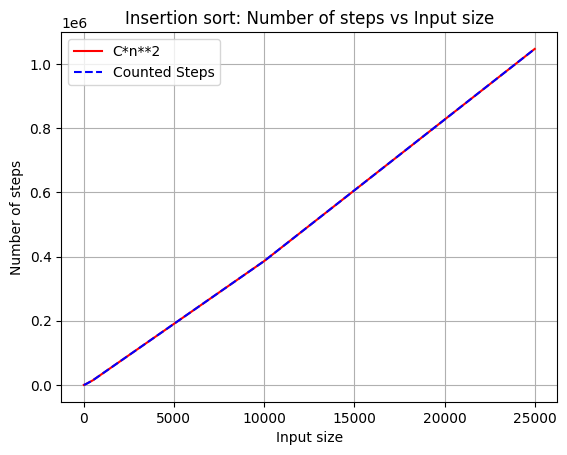

In [15]:
import math 
steps = []
input_sizes = []
actual_array = []

for arr in arrs:
    num_steps, n = heapsort(arr)
    steps.append(num_steps)
    input_sizes.append(n)
    constant_factor = num_steps / (n * math.log(n, 2))
    actual = constant_factor * n * math.log(n, 2)
    actual_array.append(actual)
    print(f"Array length: {n}, Number of steps: {num_steps}, Constant factor: {constant_factor}")

plt.plot(input_sizes, actual_array, label="C*n**2", color='red')
plt.plot(input_sizes, steps, label="Counted Steps",color='blue', linestyle='--')
plt.xlabel('Input size')
plt.ylabel('Number of steps')
plt.title('Insertion sort: Number of steps vs Input size')
plt.legend()
plt.grid(True)
plt.show()

## Quicksort

In [16]:
# Partition function with step counting
def partition(arr, low, high, num_steps):
    # Choose the pivot
    pivot = arr[high]
    
    # Index of smaller element and indicates 
    # the right position of pivot found so far
    i = low - 1
    
    # Traverse arr[low..high] and move all smaller
    # elements to the left side
    for j in range(low, high):
        num_steps += 1  # For the comparison arr[j] < pivot
        if arr[j] < pivot:
            i += 1
            swap(arr, i, j)
            num_steps += 1  # For the swap operation
    
    # Move pivot after smaller elements and return its position
    swap(arr, i + 1, high)
    num_steps += 1  # For the final swap of the pivot
    return i + 1, num_steps

# Swap function with step counting
def swap(arr, i, j):
    arr[i], arr[j] = arr[j], arr[i]

# QuickSort function with step counting
def quickSort(arr, low, high, num_steps):
    if low < high:
        # pi is the partition return index of pivot
        pi, num_steps = partition(arr, low, high, num_steps)
        
        # Recursion calls for smaller elements
        num_steps = quickSort(arr, low, pi - 1, num_steps)
        num_steps = quickSort(arr, pi + 1, high, num_steps)

    return num_steps

# # Main driver code with step tracking
# if __name__ == "__main__":
#     arr = [10, 7, 8, 9, 1, 5]
#     n = len(arr)
#     num_steps = 0  # Initialize number of steps

#     num_steps = quickSort(arr, 0, n - 1, num_steps)
    
#     for val in arr:
#         print(val, end=" ")

#     print(f"\nTotal number of steps: {num_steps}")


Array: [23, 43, 45, 72, 81]
Array length: 5, Number of steps: 24, Constant factor: 0.96
Array: [0, 0, 1, 1, 2, 2, 2, 3, 4, 5, 5, 6, 6, 7, 7, 7, 8, 12, 12, 12, 13, 14, 18, 19, 20, 20, 20, 23, 23, 24, 25, 26, 26, 27, 28, 29, 29, 29, 32, 34, 36, 36, 37, 38, 38, 40, 41, 42, 45, 46, 47, 50, 50, 52, 55, 55, 57, 60, 62, 62, 63, 64, 64, 65, 66, 67, 68, 70, 70, 70, 71, 72, 72, 72, 73, 73, 74, 76, 78, 79, 81, 81, 82, 82, 83, 83, 83, 85, 85, 85, 85, 86, 89, 90, 91, 93, 93, 97, 97, 99]
Array length: 100, Number of steps: 6515, Constant factor: 0.6515
Array: [0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 8, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 16, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 21, 22, 22, 22, 22, 22, 22, 22, 24, 24, 24, 24, 24, 24, 2

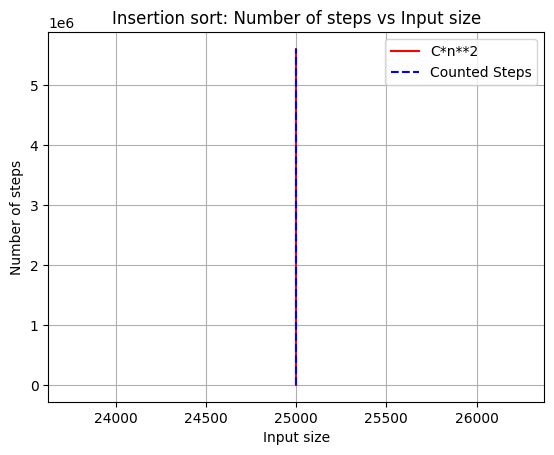

In [17]:
steps = []
input_sizes = []
actual_array = []

for arr in arrs:
    length = len(arr)  
    print(f"Array: {arr}") 
    number_steps = 0
    num_steps= quickSort(arr, 0, length - 1, number_steps)
    steps.append(num_steps)
    input_sizes.append(n)
    constant_factor = num_steps / length**2
    actual = constant_factor * length**2
    actual_array.append(actual)
    print(f"Array length: {length}, Number of steps: {num_steps}, Constant factor: {constant_factor}")

plt.plot(input_sizes, actual_array, label="C*n**2", color='red')
plt.plot(input_sizes, steps, label="Counted Steps",color='blue', linestyle='--')
plt.xlabel('Input size')
plt.ylabel('Number of steps')
plt.title('Insertion sort: Number of steps vs Input size')
plt.legend()
plt.grid(True)
plt.show()